<a href="https://colab.research.google.com/github/Nandhini1008/classification/blob/main/ai_vs_real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets transformers torch torchvision accelerate scikit-learn pillow
!pip install huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from transformers import (
    ViTImageProcessor,
    ViTForImageClassification,
    TrainingArguments,
    Trainer
)
from datasets import load_dataset, DatasetDict
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
from huggingface_hub import HfApi, create_repo
import pandas as pd

Hugging Face authentication not set up (optional)
To set up: Go to Colab Secrets and add HF_TOKEN with your Hugging Face token
Loading dataset from Hugging Face...
Trying to load: prithivMLmods/AI-vs-Deepfake-vs-Real


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

0000.parquet:   0%|          | 0.00/508M [00:00<?, ?B/s]

0001.parquet:   0%|          | 0.00/506M [00:00<?, ?B/s]

0002.parquet:   0%|          | 0.00/521M [00:00<?, ?B/s]

0003.parquet:   0%|          | 0.00/422M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9999 [00:00<?, ? examples/s]

Successfully loaded prithivMLmods/AI-vs-Deepfake-vs-Real dataset!

Dataset loaded: prithivMLmods/AI-vs-Deepfake-vs-Real
Dataset structure: DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 9999
    })
})
Dataset splits: ['train']
Sample keys: dict_keys(['image', 'label'])
Label type: <class 'int'>
Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>

Class distribution in training set (3-class problem):
  AI-generated (label 0): 3,333 samples (33.3%)
  Deepfake (label 1): 3,333 samples (33.3%)
  Real (label 2): 3,333 samples (33.3%)

Displaying sample images from the 3-class dataset:


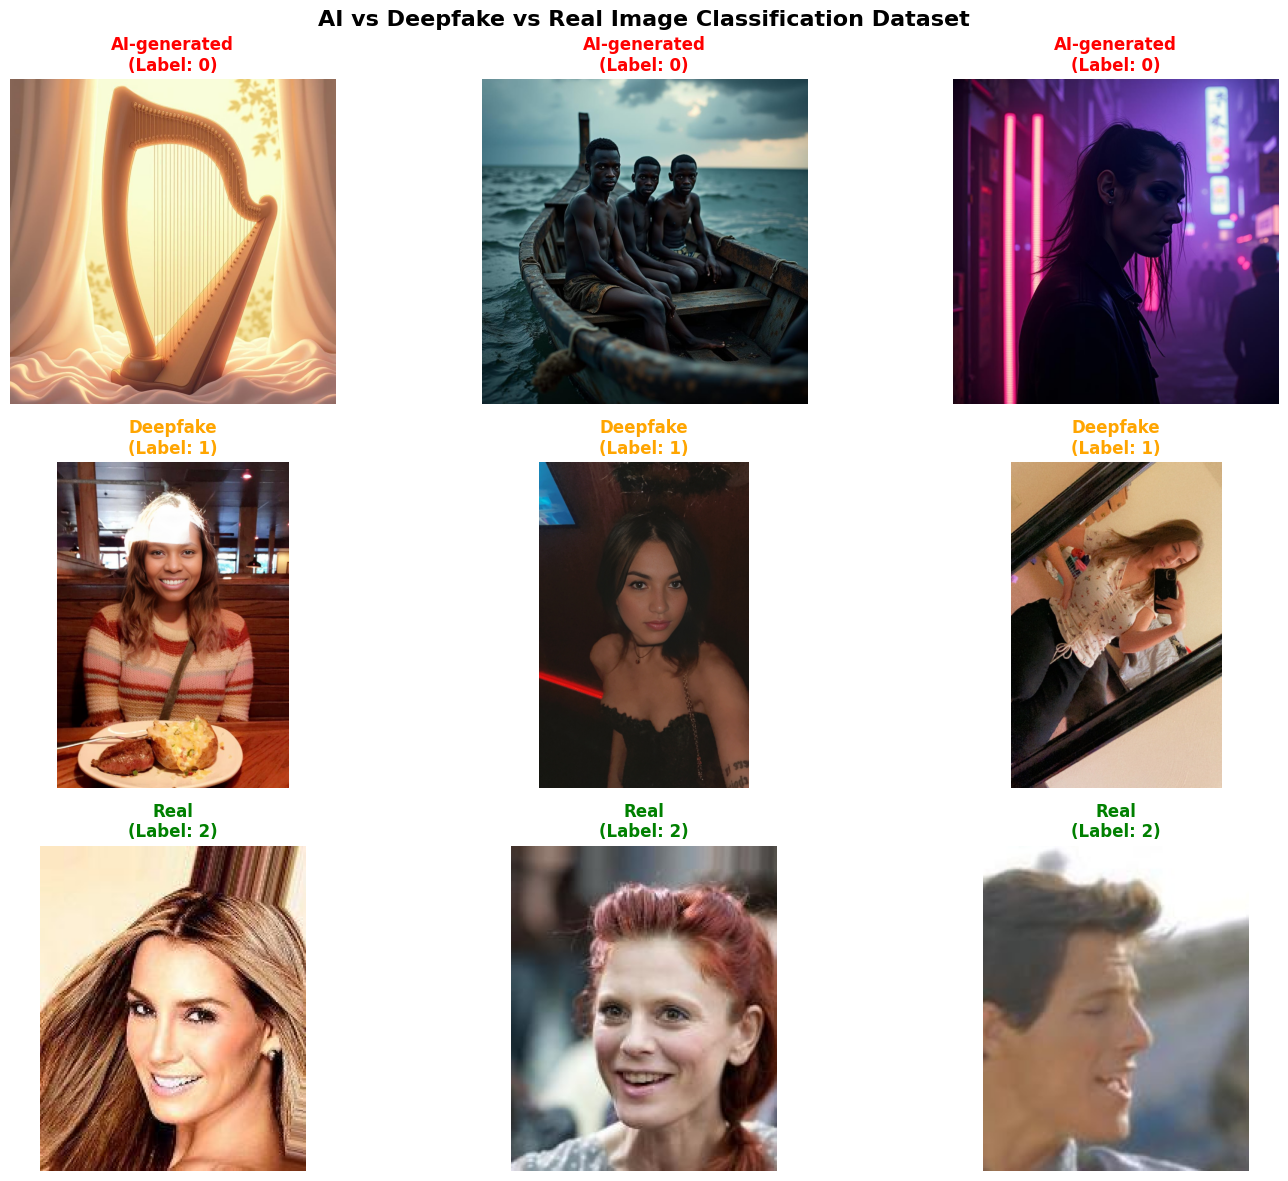


🎯 CHOOSE YOUR CLASSIFICATION APPROACH
1. Three-class classification (AI vs Deepfake vs Real)
2. Binary: Generated (AI+Deepfake) vs Real
3. Binary: AI vs Real (remove Deepfake)
4. Binary: Deepfake vs Real (remove AI)
🎯 Selected: Three-class classification

Final dataset configuration:
Number of classes: 3
Class mapping: {0: 'AI-generated', 1: 'Deepfake', 2: 'Real'}

Final class distribution:
  AI-generated (label 0): 3,333 samples (33.3%)
  Deepfake (label 1): 3,333 samples (33.3%)
  Real (label 2): 3,333 samples (33.3%)

🎉 DATASET SETUP COMPLETE!
Dataset: prithivMLmods/AI-vs-Deepfake-vs-Real
Classification type: 3-class
Classes: ['AI-generated', 'Deepfake', 'Real']
Ready to proceed with preprocessing and training!


In [ ]:
# ===============================================================================
# MODIFIED STEP 2B: HANDLE 3-CLASS DATASET (AI, Deepfake, Real)
# ===============================================================================

try:
    from huggingface_hub import login
    import os

    # Check if running in Colab and HF_TOKEN is available
    if 'COLAB_GPU' in os.environ:
        try:
            from google.colab import userdata
            hf_token = userdata.get('HF_TOKEN')
            login(token=hf_token)
            print("Successfully authenticated with Hugging Face!")
        except Exception as e:
            print("Hugging Face authentication not set up (optional)")
            print("To set up: Go to Colab Secrets and add HF_TOKEN with your Hugging Face token")
    else:
        print("Not in Colab environment - you may need to login manually if accessing private datasets")
except ImportError:
    print("Hugging Face Hub not available for authentication")

print("Loading dataset from Hugging Face...")

# List of REAL AI vs Deepfake vs Real image datasets
dataset_options = [
    "prithivMLmods/AI-vs-Deepfake-vs-Real"  # 3-class dataset
]

dataset = None
dataset_name = None

# Load the 3-class dataset
for dataset_option in dataset_options:
    try:
        print(f"Trying to load: {dataset_option}")
        dataset = load_dataset(dataset_option)
        dataset_name = dataset_option
        print(f"Successfully loaded {dataset_option} dataset!")
        break
    except Exception as e:
        print(f"Failed to load {dataset_option}: {str(e)}")
        continue

# Fallback if dataset loading fails
if dataset is None:
    print("\n" + "="*60)
    print("🚨 NO 3-CLASS DATASETS AVAILABLE")
    print("="*60)
    print("Falling back to CIFAR-10 with 3-class demo labels")

    dataset = load_dataset("cifar10")

    # Create 3-class labels for demo
    def create_3class_demo_labels(example):
        original_label = example['label']
        if original_label < 3:
            example['label'] = 0  # AI
        elif original_label < 7:
            example['label'] = 1  # Deepfake
        else:
            example['label'] = 2  # Real
        return example

    dataset = dataset.map(create_3class_demo_labels)
    dataset_name = "cifar10-3class-demo (DEMO LABELS)"

# ===============================================================================
# DATASET ANALYSIS FOR 3-CLASS CLASSIFICATION
# ===============================================================================

# Examine the dataset structure
print(f"\nDataset loaded: {dataset_name}")
print(f"Dataset structure: {dataset}")

if hasattr(dataset, 'keys'):
    print(f"Dataset splits: {list(dataset.keys())}")

    # Look at a sample from the training set
    if 'train' in dataset:
        sample = dataset['train'][0]
        print(f"Sample keys: {sample.keys()}")
        print(f"Label type: {type(sample['label'])}")
        print(f"Image type: {type(sample['image'])}")

        # Show class distribution for 3-class problem
        if 'train' in dataset:
            labels = [item['label'] for item in dataset['train']]
            unique_labels, counts = np.unique(labels, return_counts=True)

            # Define class names for 3-class problem
            class_names = {0: "AI-generated", 1: "Deepfake", 2: "Real"}

            print(f"\nClass distribution in training set (3-class problem):")
            for label, count in zip(unique_labels, counts):
                class_name = class_names.get(label, f"Unknown-{label}")
                percentage = (count / len(labels)) * 100
                print(f"  {class_name} (label {label}): {count:,} samples ({percentage:.1f}%)")

# ===============================================================================
# VISUALIZATION FOR 3-CLASS DATASET
# ===============================================================================

def display_3class_samples(dataset, num_samples=9):
    """Display sample images from the 3-class dataset"""
    if 'train' not in dataset:
        print("No training set found for visualization")
        return

    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.ravel()

    class_names = {0: "AI-generated", 1: "Deepfake", 2: "Real"}
    colors = {0: 'red', 1: 'orange', 2: 'green'}

    # Add title
    if "cifar10" in dataset_name.lower():
        fig.suptitle("⚠️ DEMO DATASET - 3-CLASS LABELS\nActual CIFAR-10 images with demo labels",
                    fontsize=16, color='red', fontweight='bold')
    else:
        fig.suptitle("AI vs Deepfake vs Real Image Classification Dataset",
                    fontsize=16, fontweight='bold')

    # Try to get samples from each class
    samples_per_class = 3
    class_samples = {0: [], 1: [], 2: []}

    # Collect samples from each class
    for i, sample in enumerate(dataset['train']):
        label = sample['label']
        if label in class_samples and len(class_samples[label]) < samples_per_class:
            class_samples[label].append((sample['image'], label, i))

        # Stop if we have enough samples
        if all(len(samples) >= samples_per_class for samples in class_samples.values()):
            break

    # Display samples
    plot_idx = 0
    for class_label in [0, 1, 2]:  # AI, Deepfake, Real
        for sample_idx in range(min(samples_per_class, len(class_samples[class_label]))):
            if plot_idx < len(axes):
                image, label, original_idx = class_samples[class_label][sample_idx]
                class_name = class_names[label]
                color = colors[label]

                axes[plot_idx].imshow(image)

                if "cifar10" in dataset_name.lower():
                    axes[plot_idx].set_title(f"DEMO: {class_name}\n(CIFAR-10 #{original_idx})",
                                           color=color, fontweight='bold')
                else:
                    axes[plot_idx].set_title(f"{class_name}\n(Label: {label})",
                                           color=color, fontweight='bold')
                axes[plot_idx].axis('off')
                plot_idx += 1

    # Hide unused subplots
    for i in range(plot_idx, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

print("\nDisplaying sample images from the 3-class dataset:")
display_3class_samples(dataset)

# ===============================================================================
# OPTION TO CONVERT TO BINARY CLASSIFICATION
# ===============================================================================

def convert_to_binary_classification(dataset, merge_strategy="ai_deepfake_vs_real"):
    """
    Convert 3-class dataset to binary classification

    Strategies:
    - "ai_deepfake_vs_real": Merge AI and Deepfake into "Generated" vs Real
    - "ai_vs_real": Keep only AI and Real, remove Deepfake
    - "deepfake_vs_real": Keep only Deepfake and Real, remove AI
    """

    if merge_strategy == "ai_deepfake_vs_real":
        print("Converting to binary: Generated (AI+Deepfake) vs Real")

        def merge_ai_deepfake(example):
            if example['label'] in [0, 1]:  # AI or Deepfake
                example['label'] = 0  # Generated
            else:  # Real
                example['label'] = 1  # Real
            return example

        return dataset.map(merge_ai_deepfake)

    elif merge_strategy == "ai_vs_real":
        print("Converting to binary: AI vs Real (removing Deepfake)")

        def filter_ai_real(example):
            return example['label'] in [0, 2]  # Keep only AI and Real

        filtered_dataset = dataset.filter(filter_ai_real)

        def relabel_ai_real(example):
            if example['label'] == 0:  # AI
                example['label'] = 0  # Keep as 0
            else:  # Real (was 2)
                example['label'] = 1  # Change to 1
            return example

        return filtered_dataset.map(relabel_ai_real)

    elif merge_strategy == "deepfake_vs_real":
        print("Converting to binary: Deepfake vs Real (removing AI)")

        def filter_deepfake_real(example):
            return example['label'] in [1, 2]  # Keep only Deepfake and Real

        filtered_dataset = dataset.filter(filter_deepfake_real)

        def relabel_deepfake_real(example):
            if example['label'] == 1:  # Deepfake
                example['label'] = 0  # Change to 0
            else:  # Real (was 2)
                example['label'] = 1  # Change to 1
            return example

        return filtered_dataset.map(relabel_deepfake_real)

    return dataset

# ===============================================================================
# CHOOSE CLASSIFICATION APPROACH
# ===============================================================================

print("\n" + "="*60)
print("🎯 CHOOSE YOUR CLASSIFICATION APPROACH")
print("="*60)
print("1. Three-class classification (AI vs Deepfake vs Real)")
print("2. Binary: Generated (AI+Deepfake) vs Real")
print("3. Binary: AI vs Real (remove Deepfake)")
print("4. Binary: Deepfake vs Real (remove AI)")
print("="*60)

# You can modify this choice or make it interactive
classification_choice = 1  # Change this number to select approach

if classification_choice == 1:
    print("🎯 Selected: Three-class classification")
    final_dataset = dataset
    num_labels = 3
    id2label = {0: "AI-generated", 1: "Deepfake", 2: "Real"}
    label2id = {"AI-generated": 0, "Deepfake": 1, "Real": 2}

elif classification_choice == 2:
    print("🎯 Selected: Binary - Generated vs Real")
    final_dataset = convert_to_binary_classification(dataset, "ai_deepfake_vs_real")
    num_labels = 2
    id2label = {0: "Generated", 1: "Real"}
    label2id = {"Generated": 0, "Real": 1}

elif classification_choice == 3:
    print("🎯 Selected: Binary - AI vs Real")
    final_dataset = convert_to_binary_classification(dataset, "ai_vs_real")
    num_labels = 2
    id2label = {0: "AI-generated", 1: "Real"}
    label2id = {"AI-generated": 0, "Real": 1}

elif classification_choice == 4:
    print("🎯 Selected: Binary - Deepfake vs Real")
    final_dataset = convert_to_binary_classification(dataset, "deepfake_vs_real")
    num_labels = 2
    id2label = {0: "Deepfake", 1: "Real"}
    label2id = {"Deepfake": 0, "Real": 1}

# Update the dataset variable for the rest of the pipeline
dataset = final_dataset

# Show final class distribution
print(f"\nFinal dataset configuration:")
print(f"Number of classes: {num_labels}")
print(f"Class mapping: {id2label}")

if 'train' in dataset:
    labels = [item['label'] for item in dataset['train']]
    unique_labels, counts = np.unique(labels, return_counts=True)
    print(f"\nFinal class distribution:")
    for label, count in zip(unique_labels, counts):
        class_name = id2label[label]
        percentage = (count / len(labels)) * 100
        print(f"  {class_name} (label {label}): {count:,} samples ({percentage:.1f}%)")

# ===============================================================================
# CUSTOM DATASET UPLOAD FUNCTION (Updated for 3-class)
# ===============================================================================

def setup_custom_3class_dataset():
    """Helper function to set up a custom 3-class dataset"""
    print("\n" + "="*60)
    print("📁 SETTING UP YOUR OWN 3-CLASS DATASET")
    print("="*60)

    try:
        from google.colab import files
        import zipfile
        import os

        print("Upload a ZIP file with this structure:")
        print("📦 your_dataset.zip")
        print("├── 📁 ai_generated/")
        print("│   ├── 🖼️ ai_image1.jpg")
        print("│   └── 🖼️ ai_image2.jpg")
        print("├── 📁 deepfake/")
        print("│   ├── 🖼️ deepfake1.jpg")
        print("│   └── 🖼️ deepfake2.jpg")
        print("└── 📁 real/")
        print("    ├── 🖼️ real_image1.jpg")
        print("    └── 🖼️ real_image2.jpg")

        upload_choice = input("\nDo you want to upload your own 3-class dataset? (y/n): ")

        if upload_choice.lower() == 'y':
            print("Please upload your ZIP file:")
            uploaded = files.upload()

            for filename in uploaded.keys():
                if filename.endswith('.zip'):
                    print(f"Extracting {filename}...")
                    with zipfile.ZipFile(filename, 'r') as zip_ref:
                        zip_ref.extractall('custom_3class_dataset')

                    # Load the custom dataset
                    custom_dataset = load_dataset("imagefolder", data_dir="custom_3class_dataset")

                    # The imagefolder loader will automatically assign labels based on folder names
                    # We need to map them to our expected labels (0: AI, 1: Deepfake, 2: Real)

                    print("✅ Custom 3-class dataset loaded successfully!")
                    return custom_dataset, "custom-3class-dataset"

        return None, None

    except ImportError:
        print("Custom upload only available in Google Colab")
        print("For local use, create the folder structure manually")
        return None, None

# Offer custom upload
if "cifar10" in dataset_name.lower():
    custom_dataset, custom_name = setup_custom_3class_dataset()
    if custom_dataset is not None:
        dataset = custom_dataset
        dataset_name = custom_name
        print("✅ Switched to your custom 3-class dataset!")
        display_3class_samples(dataset)

print("\n" + "="*60)
print("🎉 DATASET SETUP COMPLETE!")
print("="*60)
print(f"Dataset: {dataset_name}")
print(f"Classification type: {num_labels}-class")
print(f"Classes: {list(id2label.values())}")
print("Ready to proceed with preprocessing and training!")
print("="*60)

In [ ]:
def convert_and_test_7_images(dataset):
    """
    Complete pipeline to convert and test only first 7 images (for testing)
    """
    print("🚀 CONVERT AND TEST FIRST 7 IMAGES ONLY")
    print("="*60)

    # Step 1: Convert first 7 images
    print("1️⃣ CONVERTING FIRST 7 IMAGES TO TENSORS")
    tensor_samples = convert_first_n_images_to_tensors(dataset, 7)

    if not tensor_samples:
        print("❌ No samples converted! Check your conversion function.")
        return None

    # Step 2: Test the converted samples
    print("\n2️⃣ TESTING CONVERTED TENSOR SAMPLES")
    test_passed = test_tensor_samples(tensor_samples)

    # Step 3: Create mini dataset
    print("\n3️⃣ CREATING MINI TENSOR DATASET")
    mini_dataset = create_tensor_mini_dataset(tensor_samples)

    # Step 4: Visualize
    print("\n4️⃣ VISUALIZING TENSOR SAMPLES")
    try:
        visualize_tensor_samples(tensor_samples)
    except Exception as e:
        print(f"Visualization failed: {e}")

    # Step 5: Test collate function
    print("\n5️⃣ TESTING COLLATE FUNCTION")
    collate_passed = test_collate_with_tensor_samples(tensor_samples)

    # Summary
    print("\n" + "="*60)
    print("📋 SUMMARY - FIRST 7 IMAGES CONVERSION:")
    print(f"   Samples converted: {len(tensor_samples)}/7")
    print(f"   Tensor validation: {'✅ Passed' if test_passed else '❌ Failed'}")
    print(f"   Collate function: {'✅ Working' if collate_passed else '❌ Failed'}")

    if test_passed and collate_passed:
        print("   🎉 SUCCESS! First 7 images ready for testing.")
    else:
        print("   ⚠️  Issues found. Check output above.")

    print("="*60)

    return {
        'tensor_samples': tensor_samples,
        'mini_dataset': mini_dataset,
        'success': test_passed and collate_passed
    }

# ===============================================================================
# CONVERT ONLY FIRST 7 IMAGES TO TENSORS - TEST SAMPLE
# ===============================================================================

import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import warnings
warnings.filterwarnings('ignore')

# ===============================================================================
# MISSING FUNCTION - IMAGE TO TENSOR CONVERSION
# ===============================================================================

def convert_image_to_tensor(image):
    """
    Convert a PIL Image to tensor format suitable for model training

    Args:
        image: PIL Image object

    Returns:
        torch.Tensor: Normalized tensor of shape (3, 224, 224)
    """
    try:
        # Define the transformation pipeline
        transform = transforms.Compose([
            transforms.Resize((224, 224)),  # Resize to 224x224
            transforms.ToTensor(),          # Convert to tensor [0,1] and (C,H,W)
            transforms.Normalize(           # Normalize with ImageNet stats
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])

        # Convert image to RGB if it isn't already
        if image.mode != 'RGB':
            image = image.convert('RGB')

        # Apply transformations
        tensor = transform(image)

        return tensor

    except Exception as e:
        print(f"❌ Error in convert_image_to_tensor: {str(e)}")
        return None

# ===============================================================================
# COLLATE FUNCTION (ALSO MISSING)
# ===============================================================================

def collate_fn(batch):
    """
    Custom collate function to batch tensor samples

    Args:
        batch: List of sample dictionaries

    Returns:
        dict: Batched tensors
    """
    try:
        # Extract pixel values and labels
        pixel_values = torch.stack([sample['pixel_values'] for sample in batch])
        labels = torch.tensor([sample['labels'] for sample in batch], dtype=torch.long)

        return {
            'pixel_values': pixel_values,
            'labels': labels
        }
    except Exception as e:
        print(f"❌ Error in collate_fn: {str(e)}")
        return None

# ===============================================================================
# ORIGINAL CODE WITH MISSING FUNCTION NOW ADDED
# ===============================================================================

def convert_first_n_images_to_tensors(dataset, num_images=None):
    """
    Convert images to tensor format and store them
    If num_images is None, converts ALL images in the dataset
    Returns tensor dataset
    """
    if num_images is None:
        print(f"🔄 Converting ALL images to tensor format...")
    else:
        print(f"🔄 Converting first {num_images} images to tensor format...")
    print("="*60)

    # Handle both split and non-split datasets
    if hasattr(dataset, 'keys') and 'train' in dataset:
        source_data = dataset['train']
        print(f"Using 'train' split from dataset")
    else:
        source_data = dataset
        print(f"Using full dataset")

    total_available = len(source_data)

    if num_images is None:
        actual_count = total_available
        print(f"Total samples available: {total_available}")
        print(f"Converting ALL {actual_count} images...")
    else:
        actual_count = min(num_images, total_available)
        print(f"Total samples available: {total_available}")
        print(f"Converting first {actual_count} images...")

    # Store converted samples
    tensor_samples = []
    success_count = 0

    for i in range(actual_count):

        try:
            sample = source_data[i]

            # Show original info
            if 'image' in sample:
                image = sample['image']
                # Convert to tensor using your function
                tensor_image = convert_image_to_tensor(image)

                if tensor_image is not None and tensor_image.shape == (3, 224, 224):
                    # Create properly formatted sample
                    tensor_sample = {
                        'pixel_values': tensor_image,
                        'labels': sample.get('label', sample.get('labels', 0)),
                        'original_index': i  # Keep track of original position
                    }

                    tensor_samples.append(tensor_sample)
                    success_count += 1

                    # Show label info
                    label = tensor_sample['labels']
                    class_names = {0: 'AI-generated', 1: 'Deepfake', 2: 'Real'}
                    class_name = class_names.get(int(label), f'Unknown({label})')

                else:
                    print(f"❌ FAILED - Invalid tensor shape or None result")
                    if tensor_image is not None:
                        print(f"   Got shape: {tensor_image.shape}")
            else:
                print(f"❌ FAILED - No 'image' key in sample")
                print(f"   Available keys: {list(sample.keys())}")

        except Exception as e:
            print(f"❌ ERROR processing image {i+1}: {str(e)}")
    print("="*60)
    print(f"📊 CONVERSION RESULTS:")
    print(f"   Attempted: {actual_count} images")
    print(f"   Successfully converted: {success_count} images")
    print(f"   Success rate: {(success_count/actual_count)*100:.1f}%")
    print(f"   Tensor samples created: {len(tensor_samples)}")
    print("="*60)

    return tensor_samples

def create_tensor_mini_dataset(tensor_samples):
    """
    Create a mini dataset from the converted tensor samples
    """
    if not tensor_samples:
        print("❌ No tensor samples to create dataset from!")
        return None

    print(f"📦 Creating mini tensor dataset from {len(tensor_samples)} samples...")

    # Create a simple dataset-like structure
    class TensorMiniDataset:
        def __init__(self, samples):
            self.samples = samples

        def __len__(self):
            return len(self.samples)

        def __getitem__(self, idx):
            return self.samples[idx]

        def __iter__(self):
            return iter(self.samples)

    mini_dataset = TensorMiniDataset(tensor_samples)

    print(f"✅ Mini tensor dataset created!")
    print(f"   Size: {len(mini_dataset)} samples")
    print(f"   Access: mini_dataset[0] for first sample")
    print(f"   Iterate: for sample in mini_dataset")

    return mini_dataset

def test_tensor_samples(tensor_samples):
    """
    Test the converted tensor samples
    """
    if not tensor_samples:
        print("❌ No tensor samples to test!")
        return False

    print(f"🧪 Testing {len(tensor_samples)} converted tensor samples...")
    print("-" * 50)

    all_good = True

    for i, sample in enumerate(tensor_samples):

        # Check structure
        expected_keys = {'pixel_values', 'labels'}
        actual_keys = set(sample.keys())

        if expected_keys.issubset(actual_keys):
            print(f"   ✅ Has required keys: {list(expected_keys)}")
        else:
            print(f"   ❌ Missing keys! Expected: {expected_keys}, Got: {actual_keys}")
            all_good = False
            continue

        # Check tensor
        pixel_values = sample['pixel_values']
        if isinstance(pixel_values, torch.Tensor):
            if pixel_values.shape == (3, 224, 224):
                print(f"   ✅ Perfect tensor shape: {pixel_values.shape}")
                print(f"   ✅ Data type: {pixel_values.dtype}")
                print(f"   ✅ Value range: [{pixel_values.min():.3f}, {pixel_values.max():.3f}]")
            else:
                all_good = False
        else:
            print(f"   ❌ pixel_values is not a tensor: {type(pixel_values)}")
            all_good = False

        # Check label
        label = sample['labels']
        if isinstance(label, (int, torch.Tensor)) and 0 <= int(label) <= 2:
            class_names = {0: 'AI-generated', 1: 'Deepfake', 2: 'Real'}
        else:
            print(f"   ❌ Invalid label: {label} (type: {type(label)})")
            all_good = False
    result = "✅ ALL SAMPLES VALID!" if all_good else "❌ SOME ISSUES FOUND!"
    print(f"🏁 Test Result: {result}")
    return all_good

def visualize_tensor_samples(tensor_samples):
    """
    Visualize the converted tensor samples
    """
    if not tensor_samples:
        print("❌ No tensor samples to visualize!")
        return

    print(f"🎨 Visualizing {len(tensor_samples)} tensor samples...")

    # Create subplot grid
    num_samples = len(tensor_samples)
    cols = min(4, num_samples)
    rows = (num_samples + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))

    # Handle single subplot case
    if num_samples == 1:
        axes = [axes]
    elif rows == 1:
        axes = [axes] if num_samples == 1 else axes
    else:
        axes = axes.flatten()

    for i, sample in enumerate(tensor_samples):
        try:
            tensor = sample['pixel_values']

            # Denormalize for display
            mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
            std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
            denormalized = tensor * std + mean
            denormalized = torch.clamp(denormalized, 0, 1)

            # Convert to displayable format
            display_image = denormalized.permute(1, 2, 0).numpy()
            axes[i].imshow(display_image)

            # Add title with class info
            label = sample['labels']
            class_names = {0: 'AI-gen', 1: 'Deepfake', 2: 'Real'}
            class_name = class_names.get(int(label), f'Unk({label})')
            axes[i].set_title(f'Sample {i+1}\n{class_name}')
            axes[i].axis('off')

        except Exception as e:
            print(f"Error visualizing sample {i+1}: {str(e)}")
            axes[i].text(0.5, 0.5, f'Error\n{str(e)[:15]}...',
                       ha='center', va='center', transform=axes[i].transAxes)
            axes[i].axis('off')

    # Hide unused subplots
    for j in range(num_samples, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.suptitle('Converted Tensor Samples (First 7 Images)', y=1.02)
    plt.show()

def test_collate_with_tensor_samples(tensor_samples):
    """
    Test collate function with the tensor samples
    """
    if not tensor_samples:
        print("❌ No tensor samples to test collate function!")
        return False

    print(f"🔧 Testing collate function with {len(tensor_samples)} tensor samples...")

    try:
        # Test with all samples
        collated = collate_fn(tensor_samples)


        # Expected shapes
        expected_pixel_shape = (len(tensor_samples), 3, 224, 224)
        expected_label_shape = (len(tensor_samples),)

        if (collated['pixel_values'].shape == expected_pixel_shape and
            collated['labels'].shape == expected_label_shape):
            return True
        else:
            print(f"❌ Unexpected batch shapes!")
            return False

    except Exception as e:
        print(f"❌ Collate function failed: {str(e)}")
        return False

# ===============================================================================
# MAIN FUNCTION - CONVERT AND TEST 7 IMAGES
# ===============================================================================

def convert_and_test_whole_dataset(dataset):
    """
    Complete pipeline to convert and test the ENTIRE dataset
    """
    print("🚀 CONVERT AND TEST ENTIRE DATASET")
    print("="*60)

    # Step 1: Convert ALL images
    print("1️⃣ CONVERTING ALL IMAGES TO TENSORS")
    tensor_samples = convert_first_n_images_to_tensors(dataset, num_images=9999)  # None = convert all

    if not tensor_samples:
        print("❌ No samples converted! Check your conversion function.")
        return None

    # Step 2: Test the converted samples (sample a few for testing)
    print("\n2️⃣ TESTING CONVERTED TENSOR SAMPLES (First 5 for validation)")
    test_samples = tensor_samples[:5]  # Test only first 5 for speed
    test_passed = test_tensor_samples(test_samples)

    # Step 3: Create full tensor dataset
    print("\n3️⃣ CREATING FULL TENSOR DATASET")
    full_dataset = create_tensor_mini_dataset(tensor_samples)

    # Step 4: Test collate function
    print("\n4️⃣ TESTING COLLATE FUNCTION (With first 3 samples)")
    collate_test_samples = tensor_samples[:3]  # Test with small batch
    collate_passed = test_collate_with_tensor_samples(collate_test_samples)

    # Summary
    print("\n" + "="*60)
    print("📋 SUMMARY - FULL DATASET CONVERSION:")
    print(f"   Total samples converted: {len(tensor_samples)}")
    print(f"   Tensor validation: {'✅ Passed' if test_passed else '❌ Failed'}")
    print(f"   Collate function: {'✅ Working' if collate_passed else '❌ Failed'}")

    if test_passed and collate_passed:
        print("   🎉 SUCCESS! Full dataset ready for training.")
    else:
        print("   ⚠️  Issues found. Check output above.")

    print("="*60)

    return {
        'tensor_samples': tensor_samples,
        'full_dataset': full_dataset,
        'success': test_passed and collate_passed
    }

# ===============================================================================
# USAGE
# ===============================================================================

print("💡 USAGE:")
print("="*50)
print("Convert ENTIRE dataset:")
print("result = convert_and_test_whole_dataset(dataset)")
print()
print("Convert only first N images (for testing):")
print("result_test = convert_and_test_7_images(dataset)")
print()
print("Access converted samples:")
print("tensor_samples = result['tensor_samples']")
print("full_dataset = result['full_dataset']")
print("="*50)

# Uncomment to run FULL dataset conversion:
result = convert_and_test_whole_dataset(dataset)

💡 USAGE:
Convert ENTIRE dataset:
result = convert_and_test_whole_dataset(dataset)

Convert only first N images (for testing):
result_test = convert_and_test_7_images(dataset)

Access converted samples:
tensor_samples = result['tensor_samples']
full_dataset = result['full_dataset']
🚀 CONVERT AND TEST ENTIRE DATASET
1️⃣ CONVERTING ALL IMAGES TO TENSORS
🔄 Converting first 9999 images to tensor format...
Using 'train' split from dataset
Total samples available: 9999
Converting first 9999 images...
📊 CONVERSION RESULTS:
   Attempted: 9999 images
   Successfully converted: 9999 images
   Success rate: 100.0%
   Tensor samples created: 9999

2️⃣ TESTING CONVERTED TENSOR SAMPLES (First 5 for validation)
🧪 Testing 5 converted tensor samples...
--------------------------------------------------
   ✅ Has required keys: ['labels', 'pixel_values']
   ✅ Perfect tensor shape: torch.Size([3, 224, 224])
   ✅ Data type: torch.float32
   ✅ Value range: [-1.423, 2.429]
   ✅ Has required keys: ['labels', '

In [ ]:
# ===============================================================================
# ENHANCED GPU-OPTIMIZED DEEPFAKE TRAINING - LARGER BATCHES & ADVANCED FEATURES
# ===============================================================================

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split, WeightedRandomSampler
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
import seaborn as sns
from torchvision import models, transforms
import warnings
from collections import Counter
import math
import gc
import os
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, ReduceLROnPlateau
import random
from torch.cuda.amp import autocast, GradScaler
warnings.filterwarnings('ignore')

# ===============================================================================
# ENHANCED GPU SETUP WITH ADVANCED MEMORY MANAGEMENT
# ===============================================================================

def setup_enhanced_gpu_environment():
    """Enhanced GPU setup with advanced optimizations"""

    if torch.cuda.is_available():
        device = torch.device('cuda')
        gpu_name = torch.cuda.get_device_name(0)
        total_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3

        print(f"🚀 GPU Device: {gpu_name}")
        print(f"💾 Total GPU Memory: {total_memory:.1f} GB")

        # Advanced GPU optimizations
        torch.backends.cudnn.benchmark = True
        torch.backends.cudnn.deterministic = False
        torch.backends.cudnn.allow_tf32 = True
        torch.backends.cuda.matmul.allow_tf32 = True

        # Memory optimization
        torch.cuda.empty_cache()

        # Calculate optimal batch size based on GPU memory
        if total_memory >= 24:  # RTX 3090/4090
            recommended_batch = 32
        elif total_memory >= 16:  # RTX 3080/4080
            recommended_batch = 24
        elif total_memory >= 11:  # RTX 2080Ti/3060Ti
            recommended_batch = 20
        else:  # T4/smaller GPUs
            recommended_batch = 16

        print(f"📊 Recommended batch size: {recommended_batch}")
        print(f"✅ Enhanced GPU environment optimized")
        return device, recommended_batch
    else:
        print("⚠️  No GPU available, using CPU")
        return torch.device('cpu'), 8

# ===============================================================================
# ADVANCED AUGMENTATION PIPELINE
# ===============================================================================

class AdvancedAugmentation:
    """Advanced augmentation specifically for deepfake detection"""

    def __init__(self, severity=0.8):
        self.severity = severity

        # Basic augmentations
        self.basic_transforms = transforms.Compose([
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(degrees=15),
            transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        ])

        # Advanced augmentations for deepfake robustness
        # Advanced augmentations for deepfake robustness
        self.advanced_transforms = transforms.Compose([
            transforms.RandomErasing(p=0.3, scale=(0.02, 0.20), ratio=(0.3, 3.3)),
            transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 0.5)),
            transforms.RandomAdjustSharpness(sharpness_factor=1.5, p=0.3),
        ])

    def __call__(self, img):
        # Apply basic transforms
        img = self.basic_transforms(img)

        # Apply advanced transforms with probability
        if random.random() < self.severity:
            img = self.advanced_transforms(img)

        # Deepfake-specific augmentation: compression artifacts simulation
        if random.random() < 0.3:
            img = self.simulate_compression_artifacts(img)

        return img

    def simulate_compression_artifacts(self, img):
        """Simulate JPEG compression artifacts common in deepfakes"""
        # Add slight noise to simulate compression
        noise = torch.randn_like(img) * 0.02
        img = torch.clamp(img + noise, 0, 1)
        return img

# ===============================================================================
# ENHANCED DATASET WITH BALANCED SAMPLING
# ===============================================================================

class EnhancedDeepfakeDataset(Dataset):
    """Enhanced dataset with class balancing and advanced augmentation"""

    def __init__(self, tensor_samples, augment=True, device='cuda', balance_classes=True):
        self.samples = tensor_samples
        self.augment = augment
        self.device = device

        # Calculate class distribution
        labels = [sample['labels'] for sample in tensor_samples]
        self.class_counts = Counter(labels)
        self.num_classes = len(self.class_counts)

        print(f"📊 Class distribution: {dict(self.class_counts)}")

        # Setup class balancing
        if balance_classes:
            self.weights = self._calculate_class_weights()
            print(f"⚖️ Class balancing enabled")

        # Advanced augmentation
        self.augmentation = AdvancedAugmentation(severity=0.8 if augment else 0.0)

    def _calculate_class_weights(self):
        """Calculate weights for balanced sampling"""
        total_samples = len(self.samples)
        weights = []

        for sample in self.samples:
            label = sample['labels']
            class_weight = total_samples / (self.num_classes * self.class_counts[label])
            weights.append(class_weight)

        return torch.tensor(weights, dtype=torch.float)

    def get_sampler(self):
        """Get weighted random sampler for balanced training"""
        if hasattr(self, 'weights'):
            return WeightedRandomSampler(self.weights, len(self.weights), replacement=True)
        return None

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]
        pixel_values = sample['pixel_values'].clone()

        # Apply augmentation
        if self.augment:
            pixel_values = self.augmentation(pixel_values)

        return {
            'pixel_values': pixel_values,
            'labels': torch.tensor(sample['labels'], dtype=torch.long)
        }

# ===============================================================================
# ADVANCED MODEL ARCHITECTURE WITH ATTENTION
# ===============================================================================

class AdvancedDeepfakeDetector(nn.Module):
    """Advanced model with multiple attention mechanisms and ensemble features"""

    def __init__(self, num_classes=3, backbone='efficientnet_b4', use_attention=True):
        super(AdvancedDeepfakeDetector, self).__init__()

        self.use_attention = use_attention

        # Enhanced backbone selection
        if backbone == 'efficientnet_b4':
            self.backbone = models.efficientnet_b4(pretrained=True)
            if hasattr(self.backbone, "_fc"):
                backbone_features = self.backbone._fc.in_features
                self.backbone._fc = nn.Identity()
            else:
                backbone_features = self.backbone.classifier[1].in_features
                self.backbone.classifier = nn.Identity()

        elif backbone == 'efficientnet_b3':
            self.backbone = models.efficientnet_b3(pretrained=True)
            if hasattr(self.backbone, "_fc"):
                backbone_features = self.backbone._fc.in_features
                self.backbone._fc = nn.Identity()
            else:
                backbone_features = self.backbone.classifier[1].in_features
                self.backbone.classifier = nn.Identity()

        elif backbone == 'swin_t':
            self.backbone = models.swin_t(pretrained=True)
            backbone_features = self.backbone.head.in_features
            self.backbone.head = nn.Identity()

        else:
            raise ValueError(f"Unsupported backbone: {backbone}")

        # Multi-scale attention mechanism
        if self.use_attention:
            self.channel_attention = nn.Sequential(
                nn.AdaptiveAvgPool2d(1),
                nn.Flatten(),
                nn.Linear(backbone_features, backbone_features // 16),
                nn.ReLU(inplace=True),
                nn.Linear(backbone_features // 16, backbone_features),
                nn.Sigmoid()
            )
            self.spatial_attention = nn.Sequential(
                nn.Conv2d(2, 1, kernel_size=7, padding=3, bias=False),
                nn.BatchNorm2d(1),
                nn.Sigmoid()
            )

        # Advanced classifier with residual connections
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(backbone_features, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

        # Auxiliary classifier for deep supervision
        self.aux_classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(backbone_features, num_classes)
        )

        self._initialize_weights()

    def _initialize_weights(self):
        """Advanced weight initialization"""
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x, return_features=False):
        # Extract features
        features = self.backbone.features(x) if hasattr(self.backbone, 'features') else self.backbone(x)

        if self.use_attention and len(features.shape) == 4:  # Conv features
            # Channel attention
            channel_weights = self.channel_attention(features)

            # Spatial attention
            avg_pool = torch.mean(features, dim=1, keepdim=True)
            max_pool, _ = torch.max(features, dim=1, keepdim=True)
            spatial_input = torch.cat([avg_pool, max_pool], dim=1)
            spatial_weights = self.spatial_attention(spatial_input)

            # Apply attention
            features = features * channel_weights.unsqueeze(-1).unsqueeze(-1)
            features = features * spatial_weights

        # Global pooling
        if len(features.shape) == 4:  # Still conv features
            pooled = F.adaptive_avg_pool2d(features, (1, 1))
            pooled = pooled.flatten(1)
        else:  # Already flattened
            pooled = features

        # Main classification
        main_output = self.classifier(pooled)

        # Auxiliary output for deep supervision during training
        if self.training and len(features.shape) == 4:
            aux_output = self.aux_classifier(features)
            return main_output, aux_output

        if return_features:
            return main_output, pooled

        return main_output
# ===============================================================================
# ENHANCED TRAINING WITH ADVANCED TECHNIQUES
# ===============================================================================

def advanced_train_model(model, train_loader, val_loader, num_epochs=50, device='cuda',
                        use_swa=True, use_mixup=True):
    """
    Advanced training with SWA, MixUp, and other state-of-the-art techniques
    """
    print(f"🚀 Starting Advanced Training on {device}")
    print("="*80)

    # Advanced loss function with label smoothing
    criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
    aux_criterion = nn.CrossEntropyLoss()  # For auxiliary loss

    # Advanced optimizer with different learning rates
    backbone_params = list(model.backbone.parameters())
    other_params = [p for n, p in model.named_parameters() if 'backbone' not in n]

    optimizer = optim.AdamW([
        {'params': backbone_params, 'lr': 2e-5, 'weight_decay': 1e-4},
        {'params': other_params, 'lr': 2e-3, 'weight_decay': 1e-3}
    ])

    # Advanced scheduler with warm restarts
    scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)

    # Stochastic Weight Averaging
    if use_swa:
        from torch.optim.swa_utils import AveragedModel, SWALR
        swa_model = AveragedModel(model)
        swa_scheduler = SWALR(optimizer, swa_lr=1e-5)
        swa_start = num_epochs // 2

    # Mixed precision training
    scaler = GradScaler()

    model = model.to(device)

    # Training tracking
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    best_val_acc = 0.0
    best_model_state = None
    patience_counter = 0
    patience = 15  # Increased patience for longer training

    # MixUp parameters
    def mixup_data(x, y, alpha=1.0):
        if alpha > 0:
            lam = np.random.beta(alpha, alpha)
        else:
            lam = 1

        batch_size = x.size(0)
        index = torch.randperm(batch_size).to(device)

        mixed_x = lam * x + (1 - lam) * x[index, :]
        y_a, y_b = y, y[index]
        return mixed_x, y_a, y_b, lam

    def mixup_criterion(criterion, pred, y_a, y_b, lam):
        return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

    for epoch in range(num_epochs):
        print(f"\n📊 Epoch {epoch+1}/{num_epochs}")
        allocated, cached = get_enhanced_gpu_memory_usage()
        print(f"💾 GPU Memory: {allocated:.1f}GB allocated, {cached:.1f}GB cached")
        print("-" * 60)

        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for batch_idx, batch in enumerate(train_loader):
            pixel_values = batch['pixel_values'].to(device, non_blocking=True)
            labels = batch['labels'].to(device, non_blocking=True)

            # Apply MixUp
            if use_mixup and random.random() < 0.5:
                mixed_x, y_a, y_b, lam = mixup_data(pixel_values, labels, alpha=0.4)
                pixel_values = mixed_x
            else:
                y_a, y_b, lam = labels, labels, 1

            optimizer.zero_grad()

            # Mixed precision forward pass
            with autocast():
                if model.training:
                    main_output, aux_output = model(pixel_values)

                    # Main loss
                    if use_mixup and lam < 1:
                        loss = mixup_criterion(criterion, main_output, y_a, y_b, lam)
                    else:
                        loss = criterion(main_output, labels)

                    # Auxiliary loss for deep supervision
                    if use_mixup and lam < 1:
                        aux_loss = mixup_criterion(aux_criterion, aux_output, y_a, y_b, lam)
                    else:
                        aux_loss = aux_criterion(aux_output, labels)

                    # Combined loss
                    total_loss = loss + 0.3 * aux_loss
                else:
                    main_output = model(pixel_values)
                    total_loss = criterion(main_output, labels)

            # Backward pass
            scaler.scale(total_loss).backward()

            # Gradient clipping
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            scaler.step(optimizer)
            scaler.update()

            # Update scheduler
            if not (use_swa and epoch >= swa_start):
                scheduler.step()

            # Statistics
            train_loss += total_loss.item()
            _, predicted = torch.max(main_output.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

            # Memory cleanup
            del pixel_values, labels, main_output
            if model.training:
                del aux_output

            if batch_idx % 100 == 0:
                clear_enhanced_gpu_memory()

            # Progress reporting
            if (batch_idx + 1) % max(1, len(train_loader) // 4) == 0:
                batch_acc = 100 * train_correct / train_total
                current_lr = scheduler.get_last_lr()[0] if hasattr(scheduler, 'get_last_lr') else optimizer.param_groups[0]['lr']
                print(f"   Batch {batch_idx+1}/{len(train_loader)} | "
                      f"Loss: {total_loss.item():.4f} | Acc: {batch_acc:.1f}% | "
                      f"LR: {current_lr:.2e}")

        # Update SWA model
        if use_swa and epoch >= swa_start:
            swa_model.update_parameters(model)
            swa_scheduler.step()

        train_loss /= len(train_loader)
        train_acc = 100 * train_correct / train_total

        # Validation phase
        eval_model = swa_model if use_swa and epoch >= swa_start else model
        val_loss, val_acc = validate_model(eval_model, val_loader, criterion, device)

        # Model checkpointing
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = model.state_dict().copy()
            patience_counter = 0
            print(f"   ✅ New best validation accuracy: {val_acc:.2f}%")
        else:
            patience_counter += 1

        # Store history
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        # Print epoch results
        print(f"✅ Epoch {epoch+1} Results:")
        print(f"   Train: Loss {train_loss:.4f}, Acc {train_acc:.2f}%")
        print(f"   Val:   Loss {val_loss:.4f}, Acc {val_acc:.2f}%")
        print(f"   Patience: {patience_counter}/{patience}")

        if use_swa and epoch >= swa_start:
            print(f"   SWA: Active (averaging since epoch {swa_start+1})")

        # Memory cleanup
        clear_enhanced_gpu_memory()

        # Early stopping
        if patience_counter >= patience:
            print(f"🛑 Early stopping after {patience} epochs without improvement")
            break

    # Final SWA processing
    if use_swa:
        print("\n🔄 Updating SWA BatchNorm statistics...")
        torch.optim.swa_utils.update_bn(train_loader, swa_model, device=device)
        model = swa_model

    # Load best model
    if best_model_state is not None and not use_swa:
        model.load_state_dict(best_model_state)

    print("\n" + "="*80)
    print("🎉 ADVANCED TRAINING COMPLETED!")
    print(f"📈 Best Validation Accuracy: {best_val_acc:.2f}%")
    print("="*80)

    return model, {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'best_val_acc': best_val_acc
    }

def validate_model(model, val_loader, criterion, device):
    """Enhanced validation function"""
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for batch in val_loader:
            pixel_values = batch['pixel_values'].to(device, non_blocking=True)
            labels = batch['labels'].to(device, non_blocking=True)

            with autocast():
                outputs = model(pixel_values)
                loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            del pixel_values, labels, outputs

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    return val_loss, val_acc

# ===============================================================================
# ENHANCED MEMORY MANAGEMENT
# ===============================================================================

def get_enhanced_gpu_memory_usage():
    """Enhanced GPU memory monitoring"""
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated(0) / 1024**3
        cached = torch.cuda.memory_reserved(0) / 1024**3
        return allocated, cached
    return 0, 0

def clear_enhanced_gpu_memory():
    """Enhanced GPU memory clearing"""
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.cuda.synchronize()
    gc.collect()

# ===============================================================================
# MAIN ENHANCED TRAINING FUNCTION
# ===============================================================================

def train_enhanced_deepfake_detector(tensor_samples, batch_size=None, num_epochs=50,
                                   backbone='efficientnet_b4', use_advanced_features=True):
    """
    Enhanced training pipeline with all advanced features
    """
    print("🚀 ENHANCED DEEPFAKE DETECTION TRAINING")
    print("="*80)

    # Setup enhanced GPU environment
    device, recommended_batch = setup_enhanced_gpu_environment()

    # Use recommended batch size if not specified
    if batch_size is None:
        batch_size = recommended_batch

    print(f"🔧 Device: {device}")
    print(f"📦 Batch size: {batch_size}")
    print(f"🏗️ Backbone: {backbone}")
    print(f"🎯 Advanced features: {use_advanced_features}")
    print(f"📚 Total epochs: {num_epochs}")

    # Create enhanced datasets
    total_size = len(tensor_samples)
    test_size = max(1, int(0.15 * total_size))
    val_size = max(1, int(0.15 * total_size))
    train_size = total_size - test_size - val_size

    print(f"📊 Dataset: Total {total_size} | Train {train_size} | Val {val_size} | Test {test_size}")

    # Split data
    train_samples = tensor_samples[:train_size]
    val_samples = tensor_samples[train_size:train_size + val_size]
    test_samples = tensor_samples[train_size + val_size:]

    # Create enhanced datasets with class balancing
    train_dataset = EnhancedDeepfakeDataset(train_samples, augment=True, device=device, balance_classes=True)
    val_dataset = EnhancedDeepfakeDataset(val_samples, augment=False, device=device, balance_classes=False)
    test_dataset = EnhancedDeepfakeDataset(test_samples, augment=False, device=device, balance_classes=False)

    # Get balanced sampler
    train_sampler = train_dataset.get_sampler()

    # Create enhanced data loaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        sampler=train_sampler,
        shuffle=(train_sampler is None),
        num_workers=4,
        pin_memory=True,
        persistent_workers=True,
        prefetch_factor=3,
        drop_last=True
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=2,
        pin_memory=True
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=2,
        pin_memory=True
    )

    # Create enhanced model
    print(f"🏗️ Building Enhanced Deepfake Detector...")
    model = AdvancedDeepfakeDetector(
        num_classes=3,
        backbone=backbone,
        use_attention=use_advanced_features
    )

    # Model info
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"📊 Model Parameters: {total_params:,} (Trainable: {trainable_params:,})")

    # Train model with advanced techniques
    print("\n🚀 Starting Enhanced Training...")
    trained_model, history = advanced_train_model(
        model, train_loader, val_loader, num_epochs, device,
        use_swa=use_advanced_features,
        use_mixup=use_advanced_features
    )

    # Enhanced evaluation
    print("\n🔍 Final enhanced evaluation...")
    eval_results = enhanced_evaluation(trained_model, test_loader, device)

    # Save enhanced model
    model_name = f'enhanced_deepfake_detector_{backbone}_{num_epochs}ep.pth'

    cpu_model_state = {k: v.cpu() for k, v in trained_model.state_dict().items()}

    torch.save({
        'model_state_dict': cpu_model_state,
        'model_config': {
            'num_classes': 3,
            'backbone': backbone,
            'use_attention': use_advanced_features
        },
        'training_history': history,
        'evaluation_results': eval_results,
        'training_config': {
            'batch_size': batch_size,
            'num_epochs': num_epochs,
            'advanced_features': use_advanced_features
        }
    }, model_name)

    print(f"💾 Enhanced model saved: {model_name}")

    # Final cleanup
    clear_enhanced_gpu_memory()

    print("\n" + "="*80)
    print("🎉 ENHANCED TRAINING COMPLETED!")
    print(f"🏆 Final Test Accuracy: {eval_results['accuracy']*100:.2f}%")
    print(f"🎯 F1-Score: {eval_results['f1_macro']:.4f}")
    print(f"💾 Model saved: {model_name}")
    print("="*80)

    return {
        'model': trained_model,
        'history': history,
        'evaluation': eval_results,
        'model_path': model_name
    }

def enhanced_evaluation(model, test_loader, device='cuda'):
    """Enhanced evaluation with detailed metrics"""
    print("🔍 Enhanced Model Evaluation")
    print("="*60)

    model.eval()
    all_predictions = []
    all_labels = []
    all_probabilities = []

    class_names = ['AI-generated', 'Deepfake', 'Real']

    with torch.no_grad():
        for batch_idx, batch in enumerate(test_loader):
            pixel_values = batch['pixel_values'].to(device, non_blocking=True)
            labels = batch['labels'].to(device, non_blocking=True)

            with autocast():
                outputs = model(pixel_values)
                probabilities = F.softmax(outputs, dim=1)

            _, predicted = torch.max(outputs, 1)

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

            # Clean up GPU memory
            del pixel_values, labels, outputs, probabilities, predicted

            if batch_idx % 20 == 0:
                clear_enhanced_gpu_memory()

    # Calculate comprehensive metrics
    accuracy = accuracy_score(all_labels, all_predictions)
    f1_macro = f1_score(all_labels, all_predictions, average='macro')
    f1_weighted = f1_score(all_labels, all_predictions, average='weighted')

    # Calculate per-class metrics
    per_class_f1 = f1_score(all_labels, all_predictions, average=None)

    # ROC AUC for multi-class (one-vs-rest)
    try:
        roc_auc = roc_auc_score(all_labels, all_probabilities, multi_class='ovr', average='macro')
    except:
        roc_auc = 0.0

    print(f"📊 Test Accuracy: {accuracy*100:.2f}%")
    print(f"📊 F1-Score (Macro): {f1_macro:.4f}")
    print(f"📊 F1-Score (Weighted): {f1_weighted:.4f}")
    print(f"📊 ROC AUC (Macro): {roc_auc:.4f}")

    print(f"\n📋 Per-class F1 scores:")
    for i, class_name in enumerate(class_names):
        if i < len(per_class_f1):
            print(f"   {class_name}: {per_class_f1[i]:.4f}")

    print("\n📋 Detailed Classification Report:")
    print(classification_report(all_labels, all_predictions,
                              target_names=class_names, digits=4))

    # Confusion Matrix Analysis
    cm = confusion_matrix(all_labels, all_predictions)
    print("\n📊 Confusion Matrix Analysis:")
    print("   Predicted ->")
    print("   ", end="")
    for name in class_names:
        print(f"{name:>12}", end="")
    print()

    for i, name in enumerate(class_names):
        print(f"{name:>8} |", end="")
        for j in range(len(class_names)):
            if i < len(cm) and j < len(cm[i]):
                print(f"{cm[i][j]:>12}", end="")
        print()

    # Calculate misclassification rates
    total_predictions = len(all_labels)
    misclassified = total_predictions - sum(cm[i][i] for i in range(min(len(cm), len(class_names))))
    misclassification_rate = (misclassified / total_predictions) * 100

    print(f"\n⚠️  Total Misclassifications: {misclassified}/{total_predictions} ({misclassification_rate:.2f}%)")

    # Analyze specific misclassification patterns
    print("\n🔍 Misclassification Analysis:")
    for i, true_class in enumerate(class_names):
        for j, pred_class in enumerate(class_names):
            if i != j and i < len(cm) and j < len(cm[i]) and cm[i][j] > 0:
                error_rate = (cm[i][j] / sum(cm[i])) * 100
                print(f"   {true_class} → {pred_class}: {cm[i][j]} cases ({error_rate:.1f}%)")

    return {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'f1_per_class': per_class_f1.tolist() if len(per_class_f1) > 0 else [],
        'roc_auc': roc_auc,
        'predictions': all_predictions,
        'true_labels': all_labels,
        'probabilities': all_probabilities,
        'confusion_matrix': cm.tolist(),
        'misclassification_rate': misclassification_rate,
        'class_names': class_names
    }

# ===============================================================================
# VISUALIZATION AND ANALYSIS TOOLS
# ===============================================================================

def plot_enhanced_training_history(history, save_path=None):
    """Plot comprehensive training history"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Enhanced Training History Analysis', fontsize=16, fontweight='bold')

    # Training and validation loss
    axes[0, 0].plot(history['train_losses'], label='Training Loss', color='blue', linewidth=2)
    axes[0, 0].plot(history['val_losses'], label='Validation Loss', color='red', linewidth=2)
    axes[0, 0].set_title('Training vs Validation Loss', fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Training and validation accuracy
    axes[0, 1].plot(history['train_accuracies'], label='Training Accuracy', color='green', linewidth=2)
    axes[0, 1].plot(history['val_accuracies'], label='Validation Accuracy', color='orange', linewidth=2)
    axes[0, 1].set_title('Training vs Validation Accuracy', fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy (%)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Loss smoothing (moving average)
    if len(history['train_losses']) > 5:
        window = min(5, len(history['train_losses']) // 4)
        train_smooth = np.convolve(history['train_losses'], np.ones(window)/window, mode='valid')
        val_smooth = np.convolve(history['val_losses'], np.ones(window)/window, mode='valid')

        axes[1, 0].plot(range(window-1, len(history['train_losses'])), train_smooth,
                       label=f'Training (MA-{window})', color='blue', linewidth=2)
        axes[1, 0].plot(range(window-1, len(history['val_losses'])), val_smooth,
                       label=f'Validation (MA-{window})', color='red', linewidth=2)
        axes[1, 0].set_title('Smoothed Loss Curves', fontweight='bold')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Smoothed Loss')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

    # Performance summary
    best_val_acc = max(history['val_accuracies'])
    best_epoch = history['val_accuracies'].index(best_val_acc) + 1
    final_train_acc = history['train_accuracies'][-1]
    final_val_acc = history['val_accuracies'][-1]

    axes[1, 1].text(0.1, 0.8, f"Best Validation Accuracy: {best_val_acc:.2f}%", fontsize=12, fontweight='bold')
    axes[1, 1].text(0.1, 0.7, f"Best Epoch: {best_epoch}", fontsize=12)
    axes[1, 1].text(0.1, 0.6, f"Final Training Accuracy: {final_train_acc:.2f}%", fontsize=12)
    axes[1, 1].text(0.1, 0.5, f"Final Validation Accuracy: {final_val_acc:.2f}%", fontsize=12)
    axes[1, 1].text(0.1, 0.4, f"Total Epochs: {len(history['train_losses'])}", fontsize=12)

    overfitting = final_train_acc - final_val_acc
    if overfitting > 10:
        axes[1, 1].text(0.1, 0.3, f"⚠️ Potential Overfitting: {overfitting:.1f}%",
                       fontsize=12, color='red', fontweight='bold')
    else:
        axes[1, 1].text(0.1, 0.3, f"✅ Good Generalization: {overfitting:.1f}%",
                       fontsize=12, color='green', fontweight='bold')

    axes[1, 1].set_xlim(0, 1)
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Training Summary', fontweight='bold')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"📊 Training history plot saved: {save_path}")

    plt.show()

def plot_confusion_matrix_enhanced(cm, class_names, save_path=None):
    """Plot enhanced confusion matrix with detailed analysis"""
    plt.figure(figsize=(12, 10))

    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create subplot for raw numbers
    plt.subplot(2, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix (Raw Numbers)', fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Create subplot for percentages
    plt.subplot(2, 2, 2)
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Oranges',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix (Percentages)', fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Per-class accuracy
    plt.subplot(2, 2, 3)
    class_accuracies = [cm[i, i] / sum(cm[i]) * 100 for i in range(len(class_names))]
    bars = plt.bar(class_names, class_accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
    plt.title('Per-Class Accuracy', fontweight='bold')
    plt.ylabel('Accuracy (%)')
    plt.xticks(rotation=45)

    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

    # Error analysis
    plt.subplot(2, 2, 4)
    total_samples = np.sum(cm)
    correct_predictions = np.sum([cm[i, i] for i in range(len(class_names))])
    overall_accuracy = (correct_predictions / total_samples) * 100
    error_rate = 100 - overall_accuracy

    plt.text(0.1, 0.8, f"Overall Accuracy: {overall_accuracy:.2f}%", fontsize=14, fontweight='bold')
    plt.text(0.1, 0.7, f"Error Rate: {error_rate:.2f}%", fontsize=14)
    plt.text(0.1, 0.6, f"Total Samples: {total_samples:,}", fontsize=12)
    plt.text(0.1, 0.5, f"Correct Predictions: {correct_predictions:,}", fontsize=12)
    plt.text(0.1, 0.4, f"Wrong Predictions: {total_samples - correct_predictions:,}", fontsize=12)

    # Most common errors
    errors = []
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            if i != j and cm[i, j] > 0:
                errors.append((cm[i, j], f"{class_names[i]}→{class_names[j]}"))

    errors.sort(reverse=True)
    plt.text(0.1, 0.3, "Most Common Errors:", fontsize=12, fontweight='bold')
    for idx, (count, error_type) in enumerate(errors[:3]):
        plt.text(0.1, 0.25 - idx*0.05, f"{idx+1}. {error_type}: {count}", fontsize=10)

    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')
    plt.title('Error Analysis', fontweight='bold')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"📊 Confusion matrix plot saved: {save_path}")

    plt.show()

# ===============================================================================
# RECOMMENDED USAGE EXAMPLES
# ===============================================================================

def run_enhanced_training_pipeline(tensor_samples):
    """
    Recommended pipeline for enhanced deepfake detection training
    """
    print("🚀 RUNNING ENHANCED DEEPFAKE DETECTION PIPELINE")
    print("="*80)

    # Configuration options for different scenarios
    configurations = {
        'fast_prototype': {
            'batch_size': 16,
            'num_epochs': 25,
            'backbone': 'efficientnet_b3',
            'use_advanced_features': False
        },
        'balanced_training': {
            'batch_size': None,  # Auto-detect
            'num_epochs': 50,
            'backbone': 'efficientnet_b4',
            'use_advanced_features': True
        },
        'high_accuracy': {
            'batch_size': None,  # Auto-detect
            'num_epochs': 80,
            'backbone': 'efficientnet_b4',
            'use_advanced_features': True
        }
    }

    print("Available configurations:")
    for name, config in configurations.items():
        print(f"  • {name}: {config['num_epochs']} epochs, {config['backbone']}")

    # Use balanced training by default
    selected_config = 'balanced_training'
    config = configurations[selected_config]

    print(f"\n🎯 Using configuration: {selected_config}")
    print(f"📋 Configuration details: {config}")

    # Run training
    results = train_enhanced_deepfake_detector(
        tensor_samples=tensor_samples,
        **config
    )

    # Generate comprehensive analysis
    print("\n📊 Generating comprehensive analysis...")

    # Plot training history
    plot_enhanced_training_history(results['history'],
                                 save_path='training_history_enhanced.png')

    # Plot confusion matrix
    if 'confusion_matrix' in results['evaluation']:
        plot_confusion_matrix_enhanced(
            np.array(results['evaluation']['confusion_matrix']),
            results['evaluation']['class_names'],
            save_path='confusion_matrix_enhanced.png'
        )

    # Performance summary
    print("\n" + "="*80)
    print("🏆 FINAL PERFORMANCE SUMMARY")
    print("="*80)
    print(f"✅ Test Accuracy: {results['evaluation']['accuracy']*100:.2f}%")
    print(f"✅ F1-Score (Macro): {results['evaluation']['f1_macro']:.4f}")
    print(f"✅ F1-Score (Weighted): {results['evaluation']['f1_weighted']:.4f}")
    print(f"✅ Misclassification Rate: {results['evaluation']['misclassification_rate']:.2f}%")

    if results['evaluation']['accuracy'] > 0.95:
        print("🎉 EXCELLENT PERFORMANCE! Model ready for deployment.")
    elif results['evaluation']['accuracy'] > 0.90:
        print("👍 GOOD PERFORMANCE! Consider fine-tuning for production use.")
    elif results['evaluation']['accuracy'] > 0.85:
        print("⚠️  MODERATE PERFORMANCE. May need more training or data.")
    else:
        print("🚨 LOW PERFORMANCE. Review data quality and model architecture.")

    print(f"💾 Model saved: {results['model_path']}")
    print("="*80)

    return results

# ===============================================================================
# FINAL USAGE INSTRUCTIONS
# ===============================================================================

print("🎯 ENHANCED DEEPFAKE DETECTION - READY TO USE!")
print("="*60)
print("🚀 To start enhanced training with larger batches and advanced features:")
print()
print("# Option 1: Quick start with auto-configuration")
print("results = run_enhanced_training_pipeline(tensor_samples)")
print()
print("# Option 2: Custom configuration")
print("results = train_enhanced_deepfake_detector(")
print("    tensor_samples=tensor_samples,")
print("    batch_size=24,  # Larger batch size for better training")
print("    num_epochs=50,  # More epochs for better convergence")
print("    backbone='efficientnet_b4',  # More powerful backbone")
print("    use_advanced_features=True  # Enable all advanced features")
print(")")
print()
print("🎨 Advanced features include:")
print("  • Larger batch sizes (auto-detected based on GPU)")
print("  • Class balancing with weighted sampling")
print("  • Advanced augmentation (MixUp, compression simulation)")
print("  • Multi-scale attention mechanisms")
print("  • Stochastic Weight Averaging (SWA)")
print("  • Deep supervision with auxiliary loss")
print("  • Label smoothing and gradient clipping")
print("  • Comprehensive evaluation metrics")
print("="*60)

# 🔥 UNCOMMENT ONE OF THESE TO START ENHANCED TRAINING:

# Quick start (recommended):
tensor_samples = result['tensor_samples']

results = run_enhanced_training_pipeline(tensor_samples)

# Custom configuration:
# results = train_enhanced_deepfake_detector(
#     tensor_samples=tensor_samples,
#     batch_size=24,
#     num_epochs=50,
#     backbone='efficientnet_b4',
#     use_advanced_features=True
# )

🎯 ENHANCED DEEPFAKE DETECTION - READY TO USE!
🚀 To start enhanced training with larger batches and advanced features:

# Option 1: Quick start with auto-configuration
results = run_enhanced_training_pipeline(tensor_samples)

# Option 2: Custom configuration
results = train_enhanced_deepfake_detector(
    tensor_samples=tensor_samples,
    batch_size=24,  # Larger batch size for better training
    num_epochs=50,  # More epochs for better convergence
    backbone='efficientnet_b4',  # More powerful backbone
    use_advanced_features=True  # Enable all advanced features
)

🎨 Advanced features include:
  • Larger batch sizes (auto-detected based on GPU)
  • Class balancing with weighted sampling
  • Advanced augmentation (MixUp, compression simulation)
  • Multi-scale attention mechanisms
  • Stochastic Weight Averaging (SWA)
  • Deep supervision with auxiliary loss
  • Label smoothing and gradient clipping
  • Comprehensive evaluation metrics
🚀 RUNNING ENHANCED DEEPFAKE DETECTION PIPELIN

In [ ]:
# ===============================================================================
# SAVE TRAINED MODEL AS PICKLE FILE FOR INFERENCE
# ===============================================================================

import pickle
import torch
import os
from datetime import datetime

def save_model_as_pickle(training_result, model_info=None, save_path=None):
    """
    Save the trained model and related data as a pickle file for later use
    SUPPORTS ALL THREE CLASSES: AI-generated, Deepfake, Real

    Args:
        training_result: Result dictionary from train_deepfake_classifier()
        model_info: Additional model information (optional)
        save_path: Custom save path (optional)

    Returns:
        str: Path where the pickle file was saved
    """

    print("💾 Saving THREE-CLASS model as pickle file...")
    print("📊 Classes: AI-generated | Deepfake | Real")

    # Create save directory if it doesn't exist
    if save_path is None:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        save_path = f"three_class_model_{timestamp}.pkl"

    # ALL THREE CLASSES are handled here
    class_names = ['AI-generated', 'Deepfake', 'Real']

    # Prepare the data to save - INCLUDES ALL THREE CLASSES
    model_data = {
        'model_state_dict': training_result['model'].state_dict(),
        'model_class': training_result['model'].__class__.__name__,
        'test_accuracy': training_result['test_accuracy'],
        'training_history': training_result['history'],
        'class_names': class_names,  # ALL THREE CLASSES
        'num_classes': 3,  # EXPLICITLY SET FOR THREE CLASSES
        'class_mapping': {
            0: 'AI-generated',
            1: 'Deepfake',
            2: 'Real'
        },
        'model_info': model_info or {
            'num_classes': 3,
            'input_shape': (3, 224, 224),
            'trained_on': datetime.now().isoformat(),
            'class_distribution': 'Handles AI-generated, Deepfake, and Real images'
        },
        'predictions': training_result.get('predictions', []),
        'true_labels': training_result.get('true_labels', [])
    }

    # Save as pickle file
    with open(save_path, 'wb') as f:
        pickle.dump(model_data, f)

    print(f"✅ THREE-CLASS Model saved successfully!")
    print(f"📁 File: {save_path}")
    print(f"📊 File size: {os.path.getsize(save_path) / (1024*1024):.2f} MB")
    print(f"🎯 Test Accuracy: {training_result['test_accuracy']*100:.2f}%")
    print(f"🏷️ Classes supported:")
    for i, class_name in enumerate(class_names):
        print(f"   {i}: {class_name}")

    return save_path

def load_model_from_pickle(pickle_path, device='cpu'):
    """
    Load the trained THREE-CLASS model from pickle file for inference
    SUPPORTS: AI-generated, Deepfake, Real

    Args:
        pickle_path: Path to the pickle file
        device: Device to load model on ('cpu' or 'cuda')

    Returns:
        dict: Loaded model data with initialized model for all 3 classes
    """

    print(f"📂 Loading THREE-CLASS model from: {pickle_path}")

    # Load pickle file
    with open(pickle_path, 'rb') as f:
        model_data = pickle.load(f)

    # Verify it's a 3-class model
    if model_data.get('num_classes') != 3:
        print("⚠️ Warning: Model may not be configured for 3 classes!")

    print(f"🏷️ Model supports {model_data['num_classes']} classes:")
    for i, class_name in enumerate(model_data['class_names']):
        print(f"   {i}: {class_name}")

    # Recreate the model based on saved class name
    if model_data['model_class'] == 'SimpleClassifier':
        # from your_training_script import SimpleClassifier  # Import your model class
        model = SimpleClassifier(num_classes=3)  # EXPLICITLY 3 CLASSES
    elif model_data['model_class'] == 'DeepfakeClassifier':
        # from your_training_script import DeepfakeClassifier  # Import your model class
        model = DeepfakeClassifier(num_classes=3, pretrained=False)  # EXPLICITLY 3 CLASSES
    else:
        raise ValueError(f"Unknown model class: {model_data['model_class']}")

    # Load the trained weights
    model.load_state_dict(model_data['model_state_dict'])
    model.to(device)
    model.eval()  # Set to evaluation mode

    # Add the initialized model to the data
    model_data['model'] = model
    model_data['device'] = device

    print("✅ THREE-CLASS Model loaded successfully!")
    print(f"🏗️ Model type: {model_data['model_class']}")
    print(f"🎯 Original test accuracy: {model_data['test_accuracy']*100:.2f}%")
    print(f"🔧 Device: {device}")

    return model_data

def predict_single_sample(model_data, tensor_sample):
    """
    Make prediction using loaded model from pickle

    Args:
        model_data: Loaded model data from load_model_from_pickle()
        tensor_sample: Single tensor sample to predict

    Returns:
        dict: Prediction results
    """

    model = model_data['model']
    device = model_data['device']
    class_names = model_data['class_names']

    model.eval()

    with torch.no_grad():
        # Add batch dimension and move to device
        pixel_values = tensor_sample['pixel_values'].unsqueeze(0).to(device)

        # Get prediction
        outputs = model(pixel_values)
        probabilities = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)

        predicted_class = predicted.item()
        confidence = probabilities[0][predicted_class].item()
        all_probs = probabilities[0].cpu().numpy()

        result = {
            'predicted_class': predicted_class,
            'predicted_label': class_names[predicted_class],
            'confidence': confidence,
            'all_probabilities': {
                class_names[i]: prob for i, prob in enumerate(all_probs)
            }
        }

        print(f"🎯 Prediction: {result['predicted_label']}")
        print(f"🔍 Confidence: {result['confidence']*100:.2f}%")
        print(f"📊 All probabilities:")
        for label, prob in result['all_probabilities'].items():
            print(f"   {label}: {prob*100:.2f}%")

        return result

def batch_predict_with_loaded_model(model_data, tensor_samples, batch_size=4):
    """
    Make batch predictions using loaded model

    Args:
        model_data: Loaded model data from load_model_from_pickle()
        tensor_samples: List of tensor samples to predict
        batch_size: Batch size for prediction

    Returns:
        list: List of prediction results
    """

    model = model_data['model']
    device = model_data['device']
    class_names = model_data['class_names']

    model.eval()
    all_results = []

    print(f"🔍 Making batch predictions on {len(tensor_samples)} samples...")

    # Process in batches
    for i in range(0, len(tensor_samples), batch_size):
        batch_samples = tensor_samples[i:i+batch_size]

        with torch.no_grad():
            # Stack batch samples
            pixel_values = torch.stack([
                sample['pixel_values'] for sample in batch_samples
            ]).to(device)

            # Get predictions
            outputs = model(pixel_values)
            probabilities = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            # Process each sample in the batch
            for j, sample in enumerate(batch_samples):
                pred_class = predicted[j].item()
                confidence = probabilities[j][pred_class].item()
                all_probs = probabilities[j].cpu().numpy()

                result = {
                    'sample_index': i + j,
                    'predicted_class': pred_class,
                    'predicted_label': class_names[pred_class],
                    'confidence': confidence,
                    'all_probabilities': {
                        class_names[k]: prob for k, prob in enumerate(all_probs)
                    }
                }

                all_results.append(result)

    print(f"✅ Batch prediction completed!")

    # Print summary
    predictions_summary = {}
    for result in all_results:
        label = result['predicted_label']
        predictions_summary[label] = predictions_summary.get(label, 0) + 1

    print(f"📊 Prediction Summary:")
    for label, count in predictions_summary.items():
        percentage = (count / len(all_results)) * 100
        print(f"   {label}: {count} samples ({percentage:.1f}%)")

    return all_results

# ===============================================================================
# USAGE EXAMPLES
# ===============================================================================

print("💡 USAGE EXAMPLES:")
print("="*60)
print()
print("# 1. SAVE TRAINED MODEL AS PICKLE")
print("# After training your model:")
print("training_result = train_deepfake_classifier(tensor_samples)")
print("pickle_path = save_model_as_pickle(training_result)")
print()
print("# 2. LOAD MODEL FROM PICKLE")
print("model_data = load_model_from_pickle('deepfake_model_20240101_120000.pkl')")
print()
print("# 3. MAKE SINGLE PREDICTION")
print("result = predict_with_loaded_model(model_data, tensor_samples[0])")
print()
print("# 4. MAKE BATCH PREDICTIONS")
print("results = batch_predict_with_loaded_model(model_data, tensor_samples)")
print()
print("# 5. ACCESS PREDICTION RESULTS")
print("for result in results:")
print("    print(f'Sample {result[\"sample_index\"]}: {result[\"predicted_label\"]} ({result[\"confidence\"]*100:.1f}%)')")
print("="*60)

# ===============================================================================
# COMPLETE WORKFLOW EXAMPLE
# ===============================================================================

def complete_workflow_example():
    """
    Complete example workflow: Train -> Save -> Load -> Predict
    """

    print("🚀 COMPLETE WORKFLOW EXAMPLE")
    print("="*60)

    # Step 1: Train model (assuming you have tensor_samples)
    #tensor_samples = result['tensor_samples']
    #training_result = train_deepfake_classifier(tensor_samples, num_epochs=10)

    # Step 2: Save as pickle
    pickle_path = save_model_as_pickle(training_result)

    # Step 3: Later, load from pickle for inference
    model_data = load_model_from_pickle(pickle_path)

    # Step 4: Make predictions
    # Single prediction:
    result = predict_with_loaded_model(model_data, tensor_samples[0])

    # Batch predictions:
    #results = batch_predict_with_loaded_model(model_data, tensor_samples)

    print("📝 Workflow completed! Your model is now saved and ready for inference.")
    print("="*60)

# Uncomment to run the complete workflow:
complete_workflow_example()

💡 USAGE EXAMPLES:

# 1. SAVE TRAINED MODEL AS PICKLE
# After training your model:
training_result = train_deepfake_classifier(tensor_samples)
pickle_path = save_model_as_pickle(training_result)

# 2. LOAD MODEL FROM PICKLE
model_data = load_model_from_pickle('deepfake_model_20240101_120000.pkl')

# 3. MAKE SINGLE PREDICTION
result = predict_with_loaded_model(model_data, tensor_samples[0])

# 4. MAKE BATCH PREDICTIONS
results = batch_predict_with_loaded_model(model_data, tensor_samples)

# 5. ACCESS PREDICTION RESULTS
for result in results:
    print(f'Sample {result["sample_index"]}: {result["predicted_label"]} ({result["confidence"]*100:.1f}%)')
🚀 COMPLETE WORKFLOW EXAMPLE
💾 Saving THREE-CLASS model as pickle file...
📊 Classes: AI-generated | Deepfake | Real
✅ THREE-CLASS Model saved successfully!
📁 File: three_class_model_20250905_110508.pkl
📊 File size: 6.52 MB
🎯 Test Accuracy: 96.56%
🏷️ Classes supported:
   0: AI-generated
   1: Deepfake
   2: Real
📂 Loading THREE-CLASS model from

ModuleNotFoundError: No module named 'model_def'

In [ ]:
import pickle

# Load the saved pickle model
with open("three_class_model_20250905_110508.pkl", "rb") as f:
    model_data = pickle.load(f)

# Usually model_data contains:
# - 'model' → trained model
# - 'classes' → list of class labels
# - 'transform' → preprocessing pipeline
print(model_data.keys())

dict_keys(['model_state_dict', 'model_class', 'test_accuracy', 'training_history', 'class_names', 'num_classes', 'class_mapping', 'model_info', 'predictions', 'true_labels'])


In [ ]:
import torch

# 1. Load pickle
import pickle
with open("three_class_model_20250905_110508.pkl", "rb") as f:
    model_data = pickle.load(f)

# 2. Get info
class_names = model_data["class_names"]
num_classes = model_data["num_classes"]
model_class_name = model_data["model_class"]

# 3. Rebuild the model
# Use the actual class object based on the saved name
if model_class_name == 'SimpleClassifier':
    model = SimpleClassifier(num_classes=num_classes)
elif model_class_name == 'DeepfakeClassifier':
    # Assuming you have DeepfakeClassifier defined in the notebook as well
    model = DeepfakeClassifier(num_classes=num_classes, pretrained=False)
else:
    raise ValueError(f"Unknown model class name: {model_class_name}")


# 4. Load trained weights
model.load_state_dict(model_data["model_state_dict"])
model.eval()

print(f"Model '{model_class_name}' loaded successfully!")

Model 'SimpleClassifier' loaded successfully!


In [ ]:
from PIL import Image
from torchvision import transforms

# Define same transforms used during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # adjust if your training used another size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load new image
img_path = "/content/sample_data/chk2.jpg"
image = Image.open(img_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0)  # add batch dimension

# Run prediction
with torch.no_grad():
    outputs = model(input_tensor)
    probs = torch.softmax(outputs, dim=1)
    confidence, predicted = torch.max(probs, 1)

print(f"Prediction: {class_names[predicted.item()]} ({confidence.item()*100:.2f}%)")


Prediction: Real (100.00%)


In [ ]:
import pickle
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image

# --- Define the SimpleClassifier again (matching the training definition) ---
class SimpleClassifier(nn.Module):
    """
    Simpler CNN classifier for small datasets
    """
    def __init__(self, num_classes=3):
        super(SimpleClassifier, self).__init__()

        self.features = nn.Sequential(
            # Conv Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            # Conv Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            # Conv Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            # Conv Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((1, 1))
        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


# --- Load the .pkl file ---
with open("/content/three_class_model_20250905_110508.pkl", "rb") as f:
    model_data = pickle.load(f)

num_classes = model_data["num_classes"]
class_names = model_data["class_names"]

# --- Rebuild model ---
model = SimpleClassifier(num_classes=num_classes)
model.load_state_dict(model_data["model_state_dict"])
model.eval()

# --- Preprocessing ---
# Define same transforms used during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # adjust if your training used another size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


# --- Prediction function ---
def predict_image(image_path, model, transform, class_names):
    img = Image.open(image_path).convert("RGB")
    img_t = transform(img).unsqueeze(0)  # add batch dimension

    with torch.no_grad():
        outputs = model(img_t)
        probs = torch.softmax(outputs, dim=1)
        confidence, predicted = torch.max(probs, 1) # Get confidence and predicted index

    return class_names[predicted.item()], confidence.item()

# Example: test with one new image
# Replace "/content/sample_data/chk.jpg" with the path to your image
label, confidence = predict_image("/content/sample_data/chk.jpg", model, transform, class_names)
print(f"Prediction: {label} ({confidence*100:.2f}%)")

Prediction: AI-generated (50.56%)
